# ÜBUNG 5 Visualisierungen
In dieser Übung geht es darum, verschiedene Diagramme für unterschiedliche Datenvisualisierungen kennenzulernen und zu bearbeiten. Wir werden dazu mehrere Datensätzen nutzen. 
Zwei der wohl wichtigsten Packages sind die in der Vorlesung bereits angesprochenen **matplotlib** und **seaborn**.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## PART I Erste Diagramme

**Aufgabe 1:** Erstelle ein **Scatter Plot Diagram** nutze dazu die Variablen **x**, **y**, **area** und **colors**. Gib dem Diagramm einen **Titel** und beschrifte die **Achsen**.

In [2]:
# Aufgabe Input
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = (30 * np.random.rand(N)) ** 2
colors = np.random.rand(N)

In [3]:
### CODE HERE ###

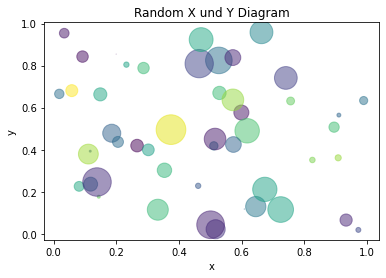

In [4]:
### LÖSUNG ###


np.random.seed(19680801)

fig, ax = plt.subplots()

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Random X und Y Diagram");

**Aufgabe 2:** Nutze Matplotlib, um die drei Diagramme nebeneinander in einer **'Figure'** zu erstellen. Nutze dazu **x**, **y** und die Liste **titel** und speicher die Figur als **png Bild**. Tipp: Ein Liniendiagram kannst du mit plt.plot() erstellen

Erstelle folgende drei Diagramme:
- y(x)</b>
- x(y)
- x(y*10)

In [5]:
x = np.linspace(0, 5, 11)
y = x ** 2

titel = ["y(x)", "x(y)", "x(y*10)"]

In [6]:
### CODE HERE ###

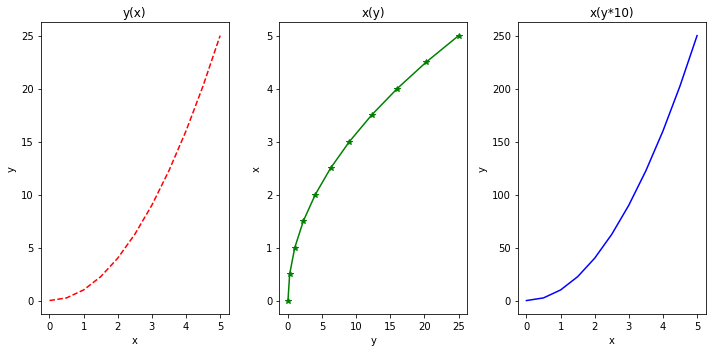

In [7]:
### LÖSUNG ###
# plt.subplot(AnzahlDerZeilen, AnzahlDerSpalten, PlotNummer)
diag, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
# Subplot 1
plt.subplot(1, 3, 1)
plt.plot(x, y, "r--")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title(titel[0])

# Subplot 2
plt.subplot(1, 3, 2)
plt.plot(y, x, "g*-")
axs[1].set_xlabel("y")
axs[1].set_ylabel("x")
axs[1].set_title(titel[1])

# Subplot 3
plt.subplot(1, 3, 3)
plt.plot(x, y * 10, "b")
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")
axs[2].set_title(titel[2])

plt.tight_layout()

diag.savefig("Figure_1.png", dpi=360)

## PART II Flüge in den USA Datensatz

**Ab jetzt arbeiten wir mit einem neuen interessanten Datensatz. Einem Airline Datensatz [link](https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay?resource=download)**

In [8]:
fluege = pd.read_csv("src/Airlines.csv", index_col="id")
fluege["lane"] = fluege["AirportFrom"] + "-" + fluege["AirportTo"]
fluege.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,lane
id,,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1,SFO-IAH
2,US,1558,PHX,CLT,3,15,222,1,PHX-CLT
3,AA,2400,LAX,DFW,3,20,165,1,LAX-DFW
4,AA,2466,SFO,DFW,3,20,195,1,SFO-DFW
5,AS,108,ANC,SEA,3,30,202,0,ANC-SEA


**Aufgabe 3:** Erstelle ein **Balkendiagramm**, welches die Anzahl der Flüge pro Airline zählt, absteigend sortiert und dabei zwischen verspäteten und pünktlichen Flügen unterscheidet.

In [9]:
### CODE HERE ###


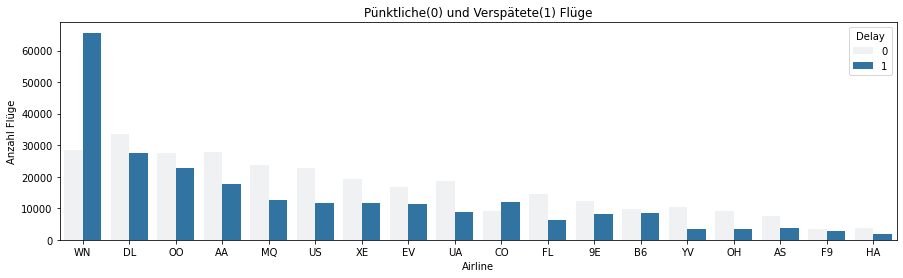

In [10]:
### LÖSUNG ###
plt.figure(figsize=(15, 4))
base_color = sns.color_palette()[0]
d = sns.countplot(
    x="Airline",
    data=fluege,
    color=base_color,
    order=fluege["Airline"].value_counts().index,
    hue="Delay",
)
d.set_ylabel("Anzahl Flüge")
d.set_title("Pünktliche(0) und Verspätete(1) Flüge");

**Aufgabe 4:** Erstelle ein **FacetGrid**, welches ein **Histogramm** über die Dauer der Flüge pro Airline anzeigt. Dabei sollen nur drei Diagramme pro Zeile angezeigt werden (Tipp: Es handelt sich um eine 3x6 Matrix von 18 Diagrammen).

In [11]:
### CODE HERE ###

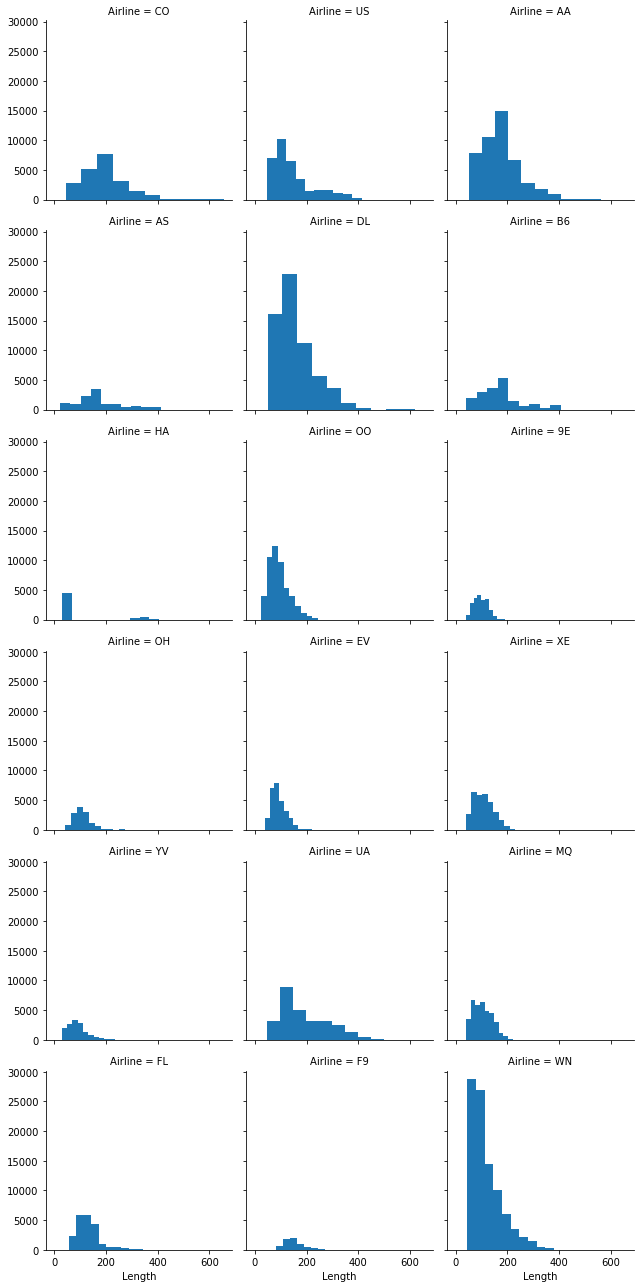

In [12]:
### LÖSUNG ###
g = sns.FacetGrid(data=fluege, col="Airline", col_wrap=3)
g.map(plt.hist, "Length");

**Wir erstellen ein neues DataFrame mit dem Namen lane_df, welches die Flüge nach den Lanes gruppiert und die Werte aggregiert.**

In [13]:
"""
Hier wird ein neuer DataFrame mit dem Namen lane_df erstellt, welches die Flüge nach der 
Lane gruppiert und sowohl die Anzahl der Delays als auch die Gesamtanzahl summiert
"""
lane_df = fluege.groupby("lane").sum()
lane_df["Total"] = fluege.groupby("lane").Delay.count()
lane_df.drop(["Flight", "DayOfWeek", "Time", "Length"], axis=1, inplace=True)
lane_df["percentage"] = np.round((lane_df.Delay / lane_df.Total) * 100, decimals=2)
lane_df.head()

,Delay,Total,percentage
lane,,,
ABE-ATL,7,31,22.58
ABE-CLT,2,31,6.45
ABE-DTW,40,85,47.06
ABE-FLL,4,17,23.53
ABE-MCO,9,31,29.03


**Aufgabe 5:** Erstelle ein **Pairplot** für das DataFrame lane_df.

In [14]:
### CODE HERE ###

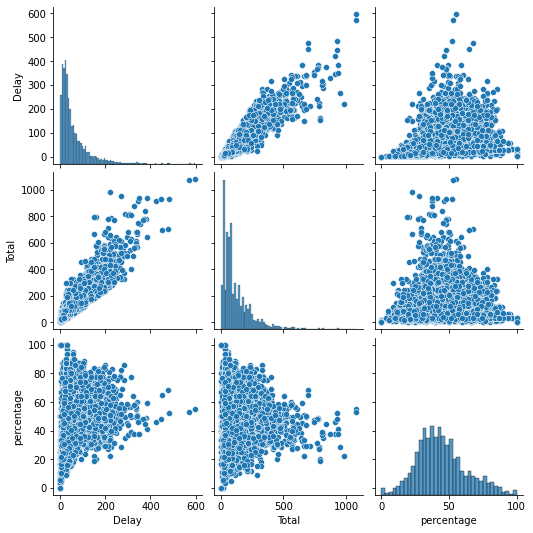

In [15]:
### LÖSUNG ###
sns.pairplot(lane_df);

**Aufgabe 6**: Erstelle ein **Histogramm**, welches die Verteilung der Gesamtanzahl der Flüge gruppiert nach den <code>'Lanes'</code> anzeigt.

In [16]:
### CODE HERE ###

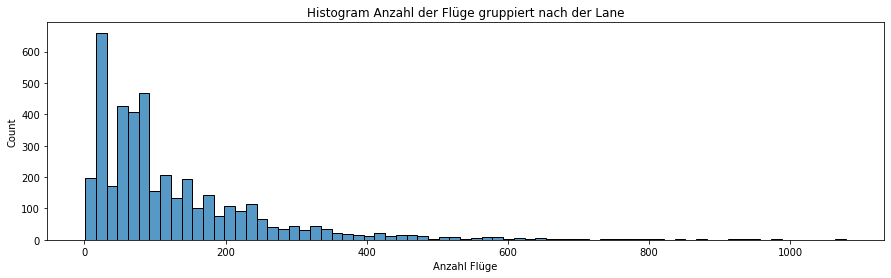

In [17]:
### LÖSUNG ###
plt.figure(figsize=(15, 4))
d = sns.histplot(lane_df["Total"])
d.set_xlabel("Anzahl Flüge")
d.set_title("Histogram Anzahl der Flüge gruppiert nach der Lane");

**Aufgabe 7:** Erstelle ein Boxplot, welches die Verteilung der Gesamtanzahl der Flüge gruppiert nach den <code>'Lanes'</code> anzeigt.

In [18]:
### CODE HERE ###

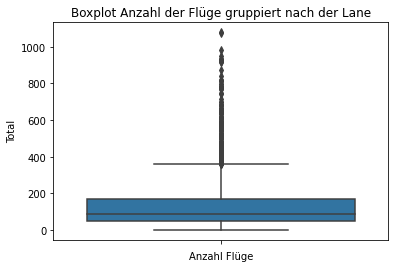

In [19]:
### LÖSUNG ###
d = sns.boxplot(y="Total", data=lane_df)
d.set_xlabel("Anzahl Flüge")
d.set_title("Boxplot Anzahl der Flüge gruppiert nach der Lane");

**(Zusatzaufgabe) Aufgabe 7:** Zeige für die 20 meist geflogenen Lanes die prozentuale Verspätung. Sortiere dabei nach der Anzahl der Flüge. Schreibe die Gesamtanzahl der Flüge in ein Balkendiagramm.

In [20]:
### CODE HERE ###

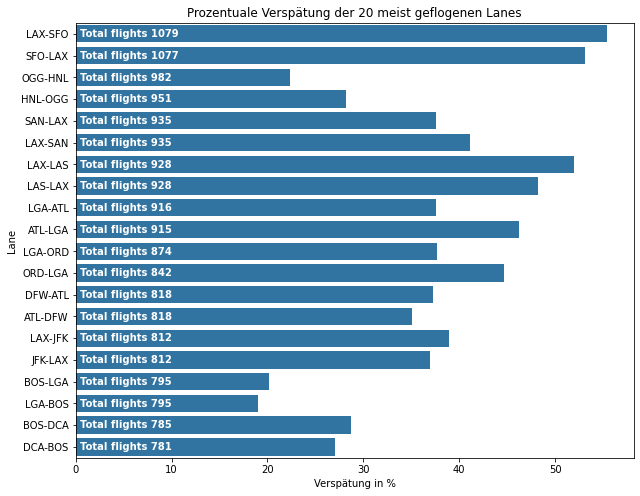

In [21]:
### LÖSUNG ###
top_20 = lane_df.sort_values(by="Total", ascending=False)[:20]

plt.figure(figsize=(10, 8))
base_color = sns.color_palette()[0]
d = sns.barplot(
    y=top_20.index,
    x="percentage",
    data=top_20,
    color=base_color,
    order=top_20.index,
    orient="h",
)

locs, labels = plt.yticks()

for loc, labels in zip(locs, labels):
    total_flights = top_20.loc[labels.get_text(), "Total"]

    plt.text(
        x=0.4,
        y=loc,
        s=f"Total flights {total_flights}",
        va="center",
        color="white",
        fontweight=650,
    )

d.set_ylabel("Lane")
d.set_xlabel("Verspätung in %")
d.set_title("Prozentuale Verspätung der 20 meist geflogenen Lanes");

## PART III Titantic Dataset

**Ab jetzt werden wir mit einem der wohl bekanntesten Datensets arbeiten. Dem Titanitc Dataset [link](https://www.kaggle.com/competitions/titanic/data).**

In [22]:
titanic_df = pd.read_csv('./src/titantic.csv')

In [23]:
titanic_df.shape

(418, 12)

In [24]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Aufgabe 9:** Erstelle ein **Punktdiagramm** (Seaborn Scatterplot), welches auf der X-Achse Fahrpreis(Fare) und auf der Y-Achse das Alter anzeigt. Die Farbliche Codierung soll die Pclass sein. Was fällt dir auf?

**Tipp:** Übrigens kann man die Farben in jedem Diagram verändern: Matplotlib stellt eine Vielzahl an Colormaps zur Verfügung, die man einfach über den Parameter palette oder cmap ansteuern kann. Hier ist eine Übersicht der Colormaps [link](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [26]:
### CODE HERE ###

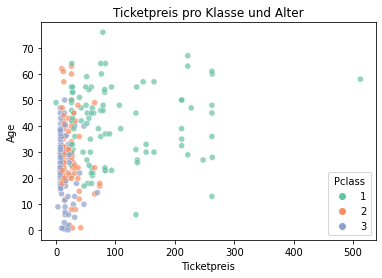

In [27]:
### LÖSUNG ###
ax=sns.scatterplot(data=titanic_df,x='Fare', y='Age',hue='Pclass', alpha=0.7, legend='full', palette='Set2')
ax.set_xlabel("Ticketpreis")
ax.set_ylabel("Age")
ax.set_title("Ticketpreis pro Klasse und Alter");
#ax.set_xscale("log")

**Aufgabe 10:** Nun erstelle mit den gleichen Daten ein **Jointplot** (Seaborn Jointplot). Was ist der Vorteil bei diesem Diagramm?

In [28]:
### CODE HERE ###

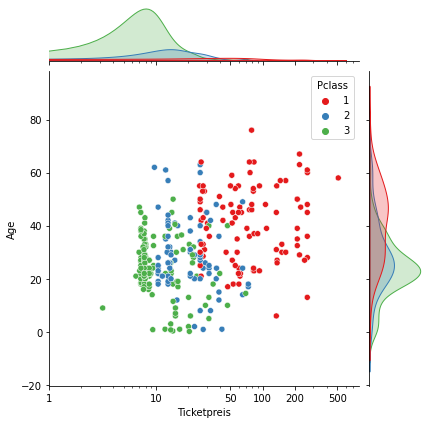

In [29]:
### LÖSUNG ###
g=sns.jointplot(x="Fare", y="Age", data=titanic_df,
                   hue='Pclass', palette='Set1')
g.ax_joint.set_xscale('log')
g.ax_joint.set_xticks([1,10,50,100,200,500], labels=['1','10', '50', '100', '200', '500'])
g.ax_joint.set_xlabel("Ticketpreis")
g.ax_joint.set_ylabel("Age");

**Aufgabe 11:** Erstelle eine **Heatmap**, die die prozentuale Verteilung der Überlebten pro Klasse zeigt. Wie viel Prozent haben in der 1, 2 und 3 Klasse überlebt bzw nicht überlebt?

In [30]:
### CODE HERE ###

In [34]:
### LÖSUNG ###
ct_counts = pd.crosstab(index= titanic_df['Pclass'], columns = titanic_df['Survived'], normalize='index')

In [35]:
### LÖSUNG ###
ct_counts

Survived,0,1
Pclass,,
1,0.532710,0.467290
2,0.677419,0.322581
3,0.669725,0.330275


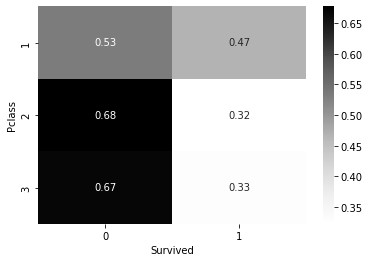

In [36]:
### LÖSUNG ###
sns.heatmap(ct_counts, annot = True, cmap='Greys');

**(Zusatzaufgabe) Aufgabe 12:** Erstelle ein **Waffleplot** für die Verteilung der Klassen auf der Titantic? Wie viele Passagiere waren in der Klasse 1, 2, 3?

In [37]:
### CODE HERE ###

In [38]:
### LÖSUNG ###
def percentage_blocks (df, var):
    
    percentages = 100 * df[var].value_counts() / df.shape [0]
    counts = np.floor(percentages).astype(int)
    decimal = (percentages - counts).sort_values(ascending=False)
    
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1
        
    return counts

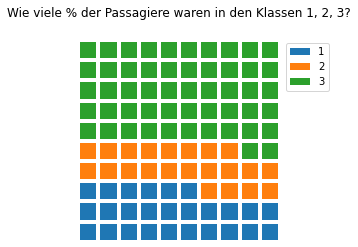

In [67]:
### LÖSUNG ###
column = 'Pclass'
waffle_counts = percentage_blocks(titanic_df, column)

prev_count = 0

for cat in range(1,waffle_counts.shape[0]+1):
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat], 1)
    
    x = blocks % 10
    
    y= blocks // 10
    
    plt.bar(x=x, height=0.8, width=0.8, bottom = y)
    prev_count += waffle_counts[cat]


plt.legend(waffle_counts.index.sort_values(), bbox_to_anchor=(0.97, 0.93))
plt.axis('off')
plt.title('Wie viele % der Passagiere waren in den Klassen 1, 2, 3?')
plt.axis('square')
plt.show()
